In [5]:
##MCC-f1-installation
#!pip install py-mcc-f1

In [ ]:
#change keras if original not working
# TF should be TF 2.1
# Keras==2.3.1
# tensorflow-addons==0.9.1

In [6]:
import sys
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
from natsort import natsorted
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Layer,Input, Dense, Dropout, Activation, Concatenate, Flatten, MaxPooling2D, Convolution2D, Convolution1D, MaxPooling1D, GlobalMaxPooling1D, BatchNormalization, LSTM, GRU, Bidirectional, Lambda
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.optimizers import SGD,Adam,RMSprop
from tensorflow.compat.v1 import InteractiveSession
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.models import load_model
import tensorflow.keras.metrics
import tensorflow_addons as tfa
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical, plot_model

In [7]:
le = LabelEncoder()

In [8]:
print(tf.__version__) #should be TF 2.1

2.3.0


In [9]:
samples = 153924
# samples #should be 153924

In [10]:
#load directly from npy files #this step skips the data loading from folders as images
off_dataset = np.load('off_dataset.npy')
target_dataset = np.load('target_dataset.npy')

In [11]:
off_dataset.shape, target_dataset.shape

((153924, 4, 28, 1), (153924, 4, 28, 1))

In [12]:
#get both types of output
output = pd.read_csv('output2.csv')
y = output['y']
freq = output['freq']

In [13]:
Y = le.fit_transform(y).reshape(-1,1)

In [14]:
Y, Y.shape

(array([[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]]), (153924, 1))

In [10]:
#len(Y[Y==0]) #7190 is positive dataset, 146734 is negative dataset

In [15]:
freq = freq.values.reshape(-1,1)
freq, freq.shape

(array([[39.],
        [39.],
        [38.],
        ...,
        [ 0.],
        [ 0.],
        [ 0.]]), (153924, 1))

In [16]:
#data summary
off_dataset.shape, target_dataset.shape, Y.shape, freq.shape
#should be ((153924, 4, 28, 1), (153924, 4, 28, 1), (153924, 1), (153924, 1))

((153924, 4, 28, 1), (153924, 4, 28, 1), (153924, 1), (153924, 1))

In [18]:
#now model
def clear_sess():
  try:
    del model, history
  except:
    pass
  from tensorflow.keras import backend as K
  K.clear_session()
  return None

In [22]:
clear_sess()


In [ ]:
# # CNN-LSTM tester code works good; ############################################## DO NOT EDIT

# #input_1

# input_1 = Input(shape = (4,28,1), name='i_1')
# conv1_1 = Convolution2D(128, 3, activation = 'relu',padding='valid')(input_1)
# bn1_1 = BatchNormalization()(conv1_1)
# conv1_2 = Convolution2D(128, 2, activation = 'relu',padding='valid')(bn1_1)
# bn1_2 = BatchNormalization()(conv1_2)
# #pool1_1 = MaxPooling2D(pool_size=2)(conv1_2)
# #testing reshape layer
# reshape_1 = Lambda(lambda x: K.squeeze(x, 1))(bn1_2)
# bilstm_1 = Bidirectional(LSTM(128, return_sequences=True))(reshape_1)
# #bilstm_11 = Bidirectional(LSTM(256, return_sequences=True))(bilstm_1)
# flat_1 = Flatten()(bilstm_1)
 
# # kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)
# #
# #
# #input_2

# input_2 = Input(shape = (4,28,1), name='i_2')
# conv2_1 = Convolution2D(128, 3, activation = 'relu',padding='valid')(input_2)
# bn2_1 = BatchNormalization()(conv2_1)
# conv2_2 = Convolution2D(128, 2, activation = 'relu',padding='valid')(bn2_1)
# bn2_2 = BatchNormalization()(conv2_2)
# #pool2_1 = MaxPooling2D(pool_size=2)(conv2_2)
# # testing reshape layer
# reshape_2 = Lambda(lambda x: K.squeeze(x, 1))(bn2_2)
# bilstm_2 = Bidirectional(LSTM(128, return_sequences=True))(reshape_2)
# #bilstm_21 = Bidirectional(LSTM(256, return_sequences=True))(bilstm_2)
# flat_2 = Flatten()(bilstm_2)
 
# # concatenate
# concat   = Concatenate()([flat_1, flat_2])
# dense1   = Dense(256, activation = 'relu', kernel_regularizer=l2(0.0005))(concat)
# #dropout1 = Dropout(0.5)(dense1)
# dense2   = Dense(256, activation = 'relu')(dense1)

# #dense3   = Dense(512, activation = 'relu')(dense2) #goes to regression


# #dense4  = Dense(1024, activation = 'relu')(dense1)
# dense4  = Dense(256, activation = 'relu')(concat)
# #dropout2 = Dropout(0.2)(dense4) #goes to classification
# #dense5  = Dense(128, activation = 'relu')(dropout2) 


# #regression output
# output_1  = Dense(1, activation = 'linear', name='r')(dense2)


# #classification output
# output_2  = Dense(1, activation = 'sigmoid', name='c')(dense4)
 
# # create model with two inputs
# model = Model(inputs=[input_1,input_2], outputs=[output_1,output_2])

In [ ]:
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()

In [23]:
# ###################### TESTING ONLY CNN ###########

# #input_1

# input_1 = Input(shape = (4,28,1), name='i_1')                       ###### testing dilated
# conv1_1 = Convolution2D(128, 3, activation = 'relu',padding='valid',dilation_rate=(1, 4))(input_1)
# bn1_1 = BatchNormalization()(conv1_1)
# conv1_2 = Convolution2D(128, 2, activation = 'relu',padding='valid',dilation_rate=(1, 4))(bn1_1)
# bn1_2 = BatchNormalization()(conv1_2)


# flat_1 = Flatten()(bn1_2)
 
# # kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)
# #
# #
# #input_2

# input_2 = Input(shape = (4,28,1), name='i_2')                  
# conv2_1 = Convolution2D(128, 3, activation = 'relu',padding='valid',dilation_rate=(1, 4))(input_2)
# bn2_1 = BatchNormalization()(conv2_1)
# conv2_2 = Convolution2D(128, 2, activation = 'relu',padding='valid',dilation_rate=(1, 4))(bn2_1)
# bn2_2 = BatchNormalization()(conv2_2)

# flat_2 = Flatten()(bn2_1)
 
# # concatenate
# concat   = Concatenate()([flat_1, flat_2])
# dense1   = Dense(256, activation = 'relu', kernel_regularizer=l2(0.0005))(concat)
# #dropout1 = Dropout(0.5)(dense1)
# dense2   = Dense(256, activation = 'relu')(dense1)

# #dense3   = Dense(512, activation = 'relu')(dense2) #goes to regression


# #dense4  = Dense(1024, activation = 'relu')(dense1)
# dense4  = Dense(256, activation = 'relu')(concat)
# #dropout2 = Dropout(0.2)(dense4) #goes to classification
# #dense5  = Dense(128, activation = 'relu')(dropout2) 


# #regression output
# output_1  = Dense(1, activation = 'linear', name='r')(dense2)


# #classification output
# output_2  = Dense(1, activation = 'sigmoid', name='c')(dense4)
 
# # create model with two inputs
# model = Model(inputs=[input_1,input_2], outputs=[output_1,output_2])

In [1]:
# model.summary()

In [20]:
# model_name  = 'only_cnn_bn_cnn_bn_l2p0005_256r_256c' #l2=0.001, 0.0005

In [2]:
# plot_model(model,  to_file=model_name+'.png', show_shapes=True, show_layer_names=True)

In [37]:
# #metrics for classification
# metrics_c = [
#     #keras.metrics.FalseNegatives(name="fn"),
#     #keras.metrics.FalsePositives(name="fp"),
#     #keras.metrics.TrueNegatives(name="tn"),
#     #keras.metrics.TruePositives(name="tp"),
#     #keras.metrics.BinaryAccuracy(name='accuracy'),
#     tensorflow.keras.metrics.Precision(name="precision"),
#     tensorflow.keras.metrics.Recall(name="recall"),
#     tensorflow.keras.metrics.AUC(name="auc_pr",curve="PR")
# ]

# #metric_r = tfa.metrics.r_square.RSquare()
# metric_r = tfa.metrics.r_square.RSquare(dtype=tf.float32, y_shape=(1,))

In [38]:
# #model compile is one of the most important step
# model.compile(optimizer=tensorflow.keras.optimizers.Adam(lr=0.0001),
#               loss={'r': 'mse','c': 'binary_crossentropy'},
#               loss_weights={'r': 0.001,'c': 1.0},
#               metrics={'r':[metric_r],'c':metrics_c})

In [ ]:
# #model compile is one of the most important step
# model.compile(optimizer=keras.optimizers.Adam(lr=0.0001),
#               loss={'r': 'mse','c': 'binary_crossentropy'},
#               loss_weights={'r': 0.0002,'c': 1.0},
#               metrics={'r':'mse','c':metrics_c})

In [17]:

# use of indexes to refer data later
img_indexes = list(range(0,samples))


#for conv2D
off_dataset_train, off_dataset_test, target_dataset_train, target_dataset_test, Y_train, Y_test, freq_train, freq_test, train_index, test_index = train_test_split(off_dataset, target_dataset,Y,freq,img_indexes, test_size=0.1, random_state=10) 




#off_dataset_train, off_dataset_valid, target_dataset_train, target_dataset_valid, Y_train, Y_valid, freq_train, freq_valid, train_index, valid_index = train_test_split(off_dataset_train, target_dataset_train,Y_train,freq_train,train_index, test_size=1/9, random_state=2)



In [18]:
#train summary
off_dataset_train.shape,target_dataset_train.shape,freq_train.shape,Y_train.shape

((138531, 4, 28, 1), (138531, 4, 28, 1), (138531, 1), (138531, 1))

In [16]:
#validation summary
#off_dataset_valid.shape,target_dataset_valid.shape,freq_valid.shape,Y_valid.shape

In [19]:
#test summary
off_dataset_test.shape, target_dataset_test.shape, freq_test.shape,Y_test.shape

((15393, 4, 28, 1), (15393, 4, 28, 1), (15393, 1), (15393, 1))

In [ ]:
# early_stopping = EarlyStopping(monitor='val_loss', patience=10,restore_best_weights=True, verbose=1)

In [30]:
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,patience=5, min_lr=0.00000001, verbose=1)

In [32]:
# #checkpoint_filepath = './checkpoints/'
# checkpoint_filepath = 'weights-improvement-{epoch:02d}-{val_c_auc_pr:.4f}-{val_r_r_square:.4f}.hdf5'
# model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,save_weights_only=False,monitor='val_c_auc_pr',mode='max',save_best_only=False)

In [13]:
# try:
#   history=model.fit([off_dataset_train,target_dataset_train],[freq_train,Y_train], 
#                   batch_size=64, epochs=70, 
#                   validation_data=([off_dataset_test,target_dataset_test],[freq_test,Y_test]),
#                   #class_weight={0: 0.525, 1: 10.704},
#                   #validation_split=0.1,
#                   class_weight={'c': {0: 0.525, 1: 10.704}},
#                   #class_weight={0: 0.525, 1: 10.704},
#                   #callbacks=[reduce_lr,model_checkpoint_callback],
#                     verbose=1)
# except KeyboardInterrupt:
#   old_history = history
#   model.save(model_name+'.hdf5')
#   print('Model saved to drive')

In [ ]:
 #save model
#model.save(model_name+'_epoch80'+'.hdf5')

In [18]:
# #### some worked around for TF installed and TF needed
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [14]:
###model = tf.keras.models.load_model('seed_07/weights-improvement-60-0.7588-0.7289.hdf5',compile=False)

####model = tf.keras.models.load_model('seed_07/weights-improvement-50-0.7708-0.6933.hdf5',compile=False)

In [ ]:
# #model compile for the load model
# model.compile(optimizer=keras.optimizers.Adam(lr=0.0000001),
#               loss={'r': 'mse','c': 'binary_crossentropy'},
#               loss_weights={'r': 0.001,'c': 1.0},
#               metrics={'r':[metric_r],'c':metrics_c})

In [ ]:
# #training plots
# fig = plt.figure(figsize=(10,15))
# plt.subplot(3,2,1)
# plt.plot(history.history['c_loss'])
# plt.plot(history.history['val_c_loss'])
# plt.title("Classification C losses")
# plt.ylabel("Classification C Losses")
# plt.xlabel("Epoch")
# plt.legend(["Training Classification Loss","Valid Classification Loss"])
# plt.subplot(3,2,2)
# plt.plot(history.history['r_loss'])
# plt.plot(history.history['val_r_loss'])
# plt.title("Regression Loss")
# plt.ylabel("Regression Loss")
# plt.xlabel("Epoch")
# plt.legend(["Training Regression Loss","Validation Regression Loss"])
# plt.subplot(3,2,3)
# plt.plot(history.history['r_r_square'])
# plt.plot(history.history['val_r_r_square'])
# plt.title("Regression r2")
# plt.ylabel("Regression r2")
# plt.xlabel("Epoch")
# plt.legend(["Training Regression r2","Valid Regression r2"])
# plt.subplot(3,2,4)
# plt.plot(history.history['c_precision'])
# plt.plot(history.history['val_c_precision'])
# plt.title("Classification precision")
# plt.ylabel("Classification precision")
# plt.xlabel("Epoch")
# plt.legend(["Training Classification precision","Valid Classification precision"])
# plt.subplot(3,2,5)
# plt.plot(history.history['c_recall'])
# plt.plot(history.history['val_c_recall'])
# plt.title("Classification recall")
# plt.ylabel("Classification recall")
# plt.xlabel("Epoch")
# plt.legend(["Training Classification recall","Valid Classification recall"])
# plt.subplot(3,2,6)
# plt.plot(history.history['c_auc_pr'])
# plt.plot(history.history['val_c_auc_pr'])
# plt.title("Classification auc")
# plt.ylabel("Classification auc")
# plt.xlabel("Epoch")
# plt.legend(["Training Classification auc","Valid Classification auc"])
# plt.show()

In [20]:
# ### MOdel LOAD

model_loaded = 'june_rerun_models/model10_epoch40-0.8465.hdf5'  #right click copy path and paste here

model = tf.keras.models.load_model(model_loaded,compile=False) #put here the model path and run all the tabs below

In [21]:
# predict on test set
yreg_pred_test, ycls_pred_test = model.predict([off_dataset_test,target_dataset_test])

In [22]:
# predict on training set
yreg_pred_train, ycls_pred_train = model.predict([off_dataset_train,target_dataset_train])

In [23]:
plt.style.use('classic')

In [24]:
#plots
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()


for i in range(1):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], ycls_pred_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

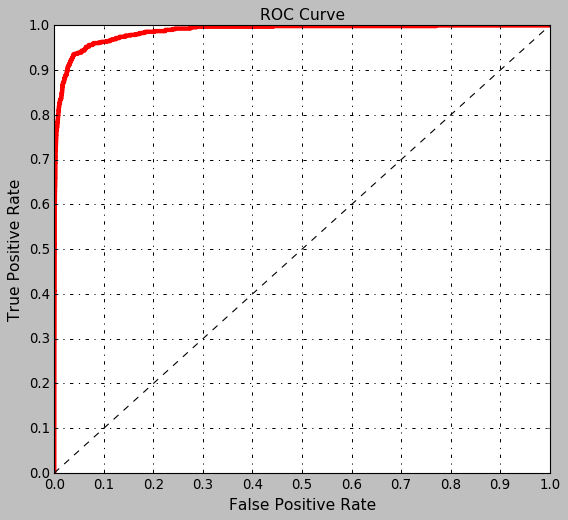

In [27]:
# Plot of a ROC curve for a specific class
fig, ax = plt.subplots(figsize=(8,7))
ax.plot(fpr[0], tpr[0], alpha=1,linewidth=4.0, color='r')
ax.plot([0, 1], [0, 1], 'k--')
ax.set_ylim([0.0, 1.001])
ax.set_xlim([0.0, 1.001])
ax.set_yticks(np.arange(0, 1.001, 0.1))
ax.set_xticks(np.arange(0, 1.001, 0.1))
ax.set_xlabel('False Positive Rate', fontsize=14)
ax.set_ylabel('True Positive Rate', fontsize=14)
ax.set_title('ROC Curve', fontsize=14)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12) 
ax.grid(linestyle='-.', linewidth=0.9)

#ax.legend(fontsize=12)
#####plt.savefig('seed10_june21_runs_roc_manuscript_best_0.9869.png', dpi=1200, bbox_inches='tight')

In [28]:
precision = dict()
recall = dict()
average_precision = dict()
for i in range(1):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i], ycls_pred_test[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], ycls_pred_test[:, i])

Text(0.5, 0.1, 'aucPR=0.886')

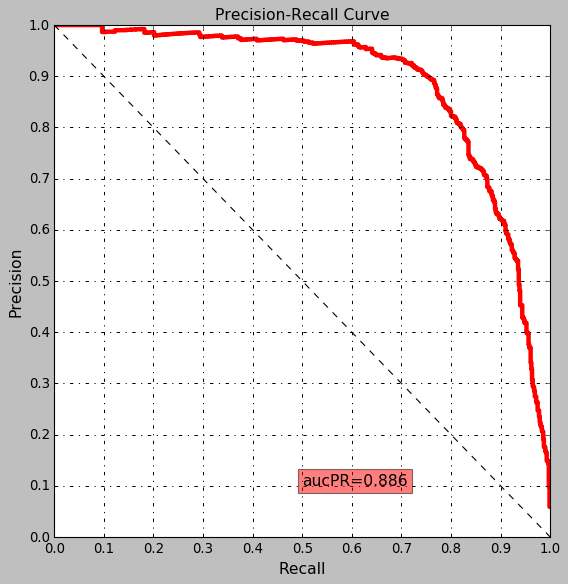

In [29]:
# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(), ycls_pred_test.ravel())
average_precision["micro"] = average_precision_score(Y_test, ycls_pred_test, average="micro")
#print('Average precision score , micro-averaged over all classes: {0:0.2f}'
#    .format(average_precision["micro"]))

fig, ax = plt.subplots(figsize=(8,8))
ax.step(recall['micro'], precision['micro'], where='mid',linewidth=4.0,color='r')

ax.set_xlabel('Recall', fontsize=14)
ax.set_ylabel('Precision', fontsize=14)
ax.plot([0, 1], [1, 0], 'k--')
ax.set_ylim([0.0, 1.0001])
ax.set_xlim([0.0, 1.0001])
ax.set_yticks(np.arange(0, 1.0001, 0.1))
ax.set_xticks(np.arange(0, 1.0001, 0.1))
ax.set_title('Precision-Recall Curve', fontsize=14)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12) 
ax.grid(linestyle='-.', linewidth=0.9)
ax.text(0.5, 0.1, 'aucPR={0:0.3f}'.format(average_precision["micro"]), bbox=dict(facecolor='red', alpha=0.5),fontsize=14)
######plt.savefig('seed10_june21_runs_aupr_manuscript_best_0.886.png', dpi=1200, bbox_inches='tight')

In [30]:
#confusion matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics as sklearn_metrics

In [31]:
y_label_pred = np.where(ycls_pred_test > 0.5, 1, 0)
y_label_pred_train = np.where(ycls_pred_train > 0.5, 1, 0)

In [32]:
# y_label_pred,y_label_pred.shape

In [129]:
t56 = np.where(ycls_pred_test > 0.56, 1, 0)

In [130]:
print(sklearn_metrics.confusion_matrix(Y_test, t56))

[[14516   167]
 [  122   588]]


In [34]:
# tn, fp, fn, tp = sklearn_metrics.confusion_matrix(Y_test, y_label_pred).ravel()
# print(tn, fp, fn, tp)

In [132]:
print(sklearn_metrics.classification_report(Y_test, y_label_pred, digits=3))

              precision    recall  f1-score   support

           0      0.992     0.988     0.990     14683
           1      0.774     0.834     0.803       710

    accuracy                          0.981     15393
   macro avg      0.883     0.911     0.896     15393
weighted avg      0.982     0.981     0.981     15393



In [36]:
#### MCC
from sklearn.metrics import matthews_corrcoef

In [134]:
#print ('Train MCC: ', matthews_corrcoef(y_true, y_pred))
print ('Test MCC:',   matthews_corrcoef(Y_test, y_label_pred))

Test MCC: 0.7934069857804233


In [38]:
#### Cohen Kappa Score
from sklearn.metrics import cohen_kappa_score
print ('Test Cohen Kappa:',   cohen_kappa_score(Y_test, y_label_pred))

Test Cohen Kappa: 0.792798348627036


In [39]:
######## F1-MCC Score
from mcc_f1 import mcc_f1_curve, plot_mcc_f1_curve

In [40]:
mcc, f1, thresholds = mcc_f1_curve(Y_test, y_label_pred)

In [46]:
mcc, f1, thresholds

(array([0.89670349, 0.5       ]),
 array([0.80271186, 0.08818233]),
 array([1, 0]))

In [56]:
#now regression
freq_train.shape, yreg_pred_train.shape

((138531, 1), (138531, 1))

In [57]:
freq_test.shape, yreg_pred_test.shape

((15393, 1), (15393, 1))

In [58]:

## R2 calculation
from sklearn.metrics import r2_score

In [60]:
print('training_r2', r2_score(freq_train, yreg_pred_train))
print('test_r2', r2_score(freq_test, yreg_pred_test))

training_r2 0.8991552270959285
test_r2 0.6723188182096322


In [40]:
# #### calculation using TF addon function
# metric_reg_train = tfa.metrics.r_square.RSquare(dtype=tf.float32, y_shape=(1,))
# metric_reg_test = tfa.metrics.r_square.RSquare(dtype=tf.float32, y_shape=(1,))

In [42]:
# metric_reg_train.update_state(freq_train, yreg_pred_train)
# result_trainr2 = metric_reg_train.result().numpy()
# print('train R2',result_trainr2)

In [43]:
# metric_reg_test.update_state(freq_test, yreg_pred_test)
# result_testr2 = metric_reg_test.result().numpy()
# print('test R2',result_testr2)

In [78]:
# #fig, ax = plt.subplots()
# fig, ax = plt.subplots(figsize=(8,8))
# ax.scatter(freq_train, yreg_pred_train,s=5)
# ax.plot([freq.min(), freq.max()], [freq.min(), freq.max()], 'k--', lw=1)
# ax.set_xlabel('Actual')
# ax.set_ylabel('Predicted')
# ax.set_ylim([0.0, 1001])
# ax.set_xlim([0.0, 1001])
# ax.set_yticks(np.arange(0, 1001, 100))
# ax.set_xticks(np.arange(0, 1001, 100))
# ax.set_title('Training Set R2: ' + str(r2_score(freq_train, yreg_pred_train)))
# plt.show()

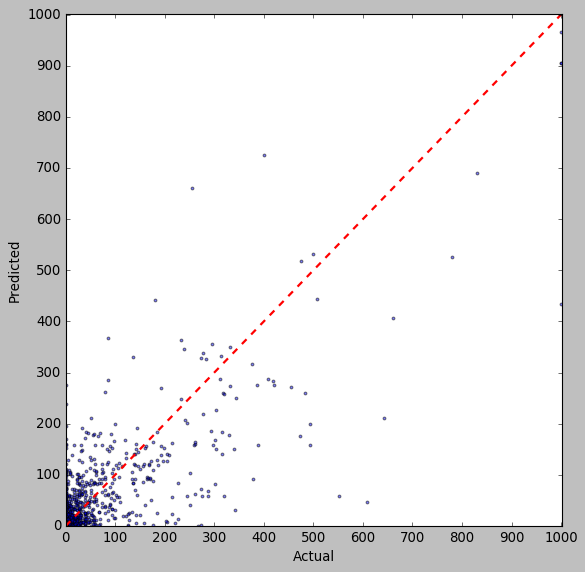

In [105]:
#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(freq_test, yreg_pred_test,s=6,alpha=0.5)
ax.plot([freq.min(), freq.max()], [freq.min(), freq.max()], 'r--', lw=2)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
# ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_ylim([0.0, 1001])
ax.set_xlim([0.0, 1001])
ax.set_yticks(np.arange(0, 1001, 100))
ax.set_xticks(np.arange(0, 1001, 100))
#ax.set_title('Test Set R2: ' + str(r2_score(freq_test, yreg_pred_test)))
plt.show()
#####plt.savefig('seed10_june21_runs_test_r2_0p6723.png', dpi=1200, bbox_inches='tight')

In [ ]:
# max(yreg_pred_test)

In [80]:
########### how many of label 1 are having a regression value.
test_zero_label = y_label_pred[y_label_pred == 0]
test_one_label = y_label_pred[y_label_pred == 1]

In [74]:
# test_zero_label.shape, test_one_label.shape

In [81]:
###### regression values according to the label
test_reg_zero_label = yreg_pred_test[y_label_pred == 0]
test_reg_one_label = yreg_pred_test[y_label_pred == 1]

In [ ]:
# test_reg_zero_label.shape, test_reg_one_label.shape

In [ ]:

# max(test_reg_zero_label),min(test_reg_zero_label )

In [ ]:

# max(test_reg_one_label),min(test_reg_one_label )

In [ ]:

# np.mean(test_reg_zero_label),np.mean(test_reg_one_label )

In [ ]:
# np.median(test_reg_zero_label),np.median(test_reg_one_label )

In [ ]:
# import matplotlib.pyplot as plt

In [ ]:
# plt.hist(test_reg_zero_label, bins='scott');

In [ ]:
# plt.hist(test_reg_one_label, bins='scott');

In [82]:
### class wise R2
train_reg_zero_label = yreg_pred_train[y_label_pred_train ==0]
train_reg_one_label = yreg_pred_train[y_label_pred_train ==1]

In [77]:
# train_reg_zero_label.shape, train_reg_one_label.shape, 

In [78]:
from sklearn.metrics import r2_score

In [79]:
# freq_train[y_label_pred_train  ==1].shape, yreg_pred_train[y_label_pred_train  ==1].shape

In [80]:
# freq_test[y_label_pred  ==1].shape, yreg_pred_test[y_label_pred  ==1].shape

In [83]:
print('one_label_training_r2', r2_score(freq_train[y_label_pred_train ==1], train_reg_one_label))
print('one_label_test_r2', r2_score(freq_test[y_label_pred ==1], test_reg_one_label))

one_label_training_r2 0.8709026616857497
one_label_test_r2 0.616442670581975


In [ ]:
# fig, ax = plt.subplots()
# ax.scatter(freq_train[y_label_pred_train ==1], train_reg_one_label,s=5)
# ax.plot([freq.min(), freq.max()], [freq.min(), freq.max()], 'k--', lw=1)
# ax.set_xlabel('Actual')
# ax.set_ylabel('Predicted')
# ax.set_title('Training Set R2: ' + str(r2_score(freq_train[y_label_pred_train ==1], train_reg_one_label)))
# plt.show()

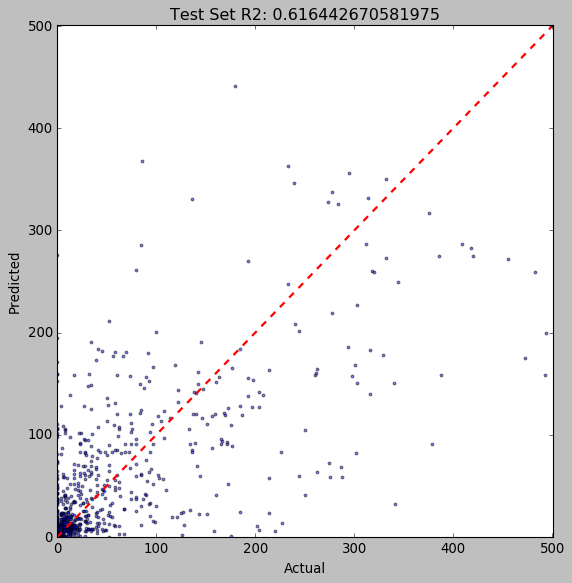

In [100]:
#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(freq_test[y_label_pred ==1], test_reg_one_label,s=6,alpha=0.5)
ax.plot([freq.min(), freq.max()], [freq.min(), freq.max()], 'r--', lw=2)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_ylim([0.0, 501])
ax.set_xlim([0.0, 501])
ax.set_yticks(np.arange(0, 501, 100))
ax.set_xticks(np.arange(0, 501, 100))
ax.set_title('Test Set R2: ' + str(r2_score(freq_test[y_label_pred ==1], test_reg_one_label)))
plt.show()
###plt.savefig('seed10_june21_runs_test_r2_0p6723.png', dpi=1200, bbox_inches='tight')

In [85]:
### explained variance score
from sklearn.metrics import explained_variance_score


In [86]:
print('exp var score:  train', explained_variance_score(freq_train[y_label_pred_train ==1], train_reg_one_label))
print('exp var score:  test', explained_variance_score(freq_test[y_label_pred ==1], test_reg_one_label))

exp var score:  train 0.919003297111685
exp var score:  test 0.6474752587708971


In [49]:
##################### F1-MCC

In [82]:

def mcc_f1(ground_truths, predicted_values):
    
    """
    The function mcc_f1 calculates MCC and F1 scores based on varying thresholds identifed by the PRC function
    based on inputs -  ground truth vaules and predicted values.
    
    Parameters
    ----------
    ground_truths, predicted_values : numpy.ndarray;
                        Input arrays; groundtruth values (True values) and predicted values.
    
    Returns
    -------
    mcc, f1, thresholds: numpy.ndarray;
                           Output arrays; Unit normalized MCC scores and F1 score values 
                           for every threshold.           
    """
    
#     mcc = []   
#     f1 = []
   
    
    # Generating thresholds with the PRC function
    precision, recall, thresholds = metrics.precision_recall_curve(
                                    ground_truths, predicted_values)
    
    mcc = np.zeros((thresholds.shape))
    f1 = np.zeros((thresholds.shape))
    # For every value of the thresholds (cutoffs), calculate MCC and F1 scores :
    for index,T in enumerate(thresholds):
        predicted_values_after_cutoff = predicted_values > T  # Positive classes are determined for every predicted value that exceeds the threshold. 
    
        ##mcc.append
        mcc[index]=(metrics.matthews_corrcoef(ground_truths, predicted_values_after_cutoff)+1)*0.5 # get normalised MCC: change the range of MCC from [-1, 1] to [0, 1] 
        
        ###f1.append(
        f1[index]=metrics.f1_score(ground_truths, predicted_values_after_cutoff)
        
    #mcc = np.array(mcc)
    #f1 = np.array(f1)  
    
    # Resulting values are an array of MCC & F1 scores across different thresholds (cutoffs)  
    return mcc,f1, thresholds

In [103]:
from tqdm import tqdm

def MCC_F1_Metric(mcc,f1,thresholds, W_num_of_subranges = 100):
    
    """
    MCC_F1_Metric function computes the MCC-F1 metric i.e. the average distances between the predcition scores to the point of Perfect Performace (1,1) 
    and also results in the best threshold value
    
    Parameters
    ----------
    
    mcc,f1, thresholds : numpy.ndarray;
                        MCC and F1 scores across varying thresholds
    
    W_num_of_subranges : int, optional;
        Number of subranges- default = 100; 
        larger values of 𝑊 will cause the MCC-𝐹1 metric to capture the performance of a classifier more accurately.
    
    Returns
    -------
    MCC_F1_Met : float;
                The ratio of the average distance of the MCC-F1 score to the Point of Perfect Performace (1,1)
                A metric to compare classifier performance.
    
    Best_threshold : int;
                Index of the best prediction score threshold (𝑇), 
                Index of the point on the MCC-𝐹1 curve closest to the point of perfect performance (1,1).
    
    """
    
     
    subrange_intervals = np.linspace(np.min(mcc), np.max(mcc),W_num_of_subranges) # breaking into subranges
    
    # Computing MCC values per subrange
    
    values_per_subrange = np.zeros_like(subrange_intervals) # 'n' is the number of points per subrange
    for i in range(W_num_of_subranges-1):
        for j in mcc:
            if j >= subrange_intervals[i] and j < subrange_intervals[i+1]:
                values_per_subrange[i] = values_per_subrange[i] + 1

    # Calculating the distances between points in a subrange to the Point of perfect performance (1,1)            
    Distance_of_points_within_subrange = np.sqrt(((mcc-1)**2)+((f1-1)**2)) # calculating the Euclidean distance 𝐷𝑖            
    sum_of_distance_within_subrange = np.zeros_like(subrange_intervals)
    index = -1
    for value in mcc:
        index += 1
        for i in range(W_num_of_subranges-1):
                 if value >= subrange_intervals[i] and value < subrange_intervals[i+1]:
                        sum_of_distance_within_subrange[i] = sum_of_distance_within_subrange[i] + Distance_of_points_within_subrange[index]

    # Mean Distance across subranges
    mean_Distance_per_subrange = np.array(sum_of_distance_within_subrange/values_per_subrange)
    total_number_of_subranges = 0  
    total_sum_of_mean_distances = 0
    for i in mean_Distance_per_subrange:
        if not np.isnan(i):
            total_number_of_subranges += 1 
            total_sum_of_mean_distances += i # addition of all the means across subranges that have atleast 1 MCC value.

    grand_mean_distance = total_sum_of_mean_distances/total_number_of_subranges # P = total number of subranges that have atleast 1 MCC value
   
    """ 
    Compare the grand average distance to √2 (The distance between the point of worst performance (0,0) and 
    the point of perfect performance (1,1) is √2).That is the maximum possible distance between a point on the MCC-𝐹1 curve
    The ratio between the grand avgerage distance and √2 is taken.
    This ratio ranges between 0 and 1 (worst value = 0; best value = 1). To get the MCC-𝐹1 score, we subtract this ratio from 1
    """

    MCC_F1_Met = 1 - (grand_mean_distance /np.sqrt(2))
  
    
    # Finding the best threshold 𝑇 the point on the MCC-𝐹1 curve closest to the point of perfect performance (1,1).
   
    result = np.where(Distance_of_points_within_subrange == Distance_of_points_within_subrange.min())
    Best_threshold = result[0][0]
    
    print("MCC-F1 metric = {0:.2f}".format(MCC_F1_Met), "Best Threshold = {0:.2f}".format(thresholds[Best_threshold]))
    
    return MCC_F1_Met,Best_threshold

In [156]:
# Generating a plot (the overall canvas);
axis = None
def axis_plotting(total_plots): 
    global axis
    if axis == None:
        fig = plt.figure(figsize=(7,7))
        axis = []        
        for i in range(1,total_plots+1):
            ax = fig.add_subplot(total_plots, 1, i)
            axis.append(ax)
            
    
def plotting(mcc, f1, thresholds,MCC_F1_Met,Best_threshold,classifer_name = "",total_plots = 1,ax = 0):
    
        """
        Plotting function - fuction to plot the MCC and F1 scores (across varying Thresholds), and highlight the the MCC_F1 metric with the best threshold
        For multiple plots, 'total_plots' should be > 1 AND 'ax' (< total_plots) starting from  1
    
        Parameters
        ----------
        mcc,f1 : numpy.ndarray;
            MCC and F1 scores across varying thresholds
    
        MCC_F1_Met : float;
                The ratio of the average distance of the MCC-F1 score to the Point of Perfect Performace (1,1)
                A metric to compare classifier performance.
    
        Best_threshold : int;
                Index of the best prediction score threshold (𝑇), 
                Index of the point on the MCC-𝐹1 curve closest to the point of perfect performance (1,1).
                
        classifer_name : str, optional
                    default = ""
    
        total_plots: int, optional
                    Number of sub-plots to generate; default = 1
    
        ax : int, optional
            Index of subplot ([1,2,3...]); default = None
    
                            
        Returns
        -------
        
        MCC-F1 curve: 
            for multiple sublplots, adjust total_plots and ax input value.
                        
        """
        
        global axis
        if total_plots > 1 and ax < total_plots: # if more than 1 total plot is mentioned;
            axis_plotting(total_plots) #calling function to generate plot;
            if ax == 0:
                subplot = plt.gca() # plot on current axis value, 
            else:
                subplot = axis[ax-1] # plotting additional graphs based on index of the axis.
        elif ax > total_plots:
            print("Index inconsistent with total_plots")
        else:
            axis = None
            subplot = plt.gca() # plot on base plot if no additional subplots are needed
      
        # Labelling the plot;
        subplot.plot(f1,mcc,linewidth=4,color='r')
        subplot.annotate(classifer_name, #+ "MCC-F1-Metric - {0:.2f}".format(MCC_F1_Met), 
                 (f1[Best_threshold],mcc[Best_threshold]), 
                 textcoords="offset points", 
                 xytext=(1,1),
                 ha='left') 
        
        subplot.scatter(f1[Best_threshold],mcc[Best_threshold],color='g',linewidth=4)
        subplot.set(xlabel='F1 score',
               ylabel='unit−normalized MCC',title='Test Set MCC-F1 curve')
        
        # Inserting Random line
        subplot.axhline(0.5,linewidth=2, color='blue',linestyle='--')
        subplot.annotate('Random prediction line',xy =(0,0.5),xytext=(250,-15),
                    color='b', xycoords = subplot.get_yaxis_transform(), 
                    textcoords="offset points", va="bottom")


        # Displaying and labelling points of performances.

        subplot.scatter(1,1,color = 'black',linewidth=4);subplot.scatter(0,0,color = 'black',linewidth=4)
        subplot.annotate('Point of Perfect performance',(1,1),
                    textcoords="offset points",xytext=(-9,-2),ha='right',size=14)
        subplot.annotate('Point of Worst performance',(0,0)
                    ,textcoords="offset points",xytext=(9,2),ha='left',size=14)
        
        subplot.set_xticks(np.arange(0, 1.1, 0.1)); subplot.set_yticks(np.arange(0, 1.1, 0.1))
        subplot.set_xlim(-0.05,1.05); subplot.set_ylim(-0.05,1.05)
        subplot.grid(alpha = 0.3)

In [105]:
####mcc,f1,thresholds = mcc_f1(Y_train, y_label_pred_train) ###train
#mcc,f1,thresholds = mcc_f1(Y_test, ycls_pred_test)
# MCC_F1_Met,T_index = MCC_F1_Metric(mcc,f1,thresholds,W_num_of_subranges=100)

MCC-F1 metric = 0.55 Best Threshold = 0.94


/home/xinfy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in true_divide


In [84]:
mcc

array([0.55782478, 0.55784697, 0.55785807, ..., 0.62980102, 0.62448453,
       0.5       ])

In [85]:
f1

array([0.11135543, 0.11137292, 0.11138167, ..., 0.13157895, 0.12169312,
       0.        ])

In [86]:
thresholds

array([6.255587e-19, 6.266191e-19, 6.285583e-19, ..., 9.999998e-01,
       9.999999e-01, 1.000000e+00], dtype=float32)

In [97]:
MCC_F1_Met

0.5558215445005983

In [98]:
T_index

10131

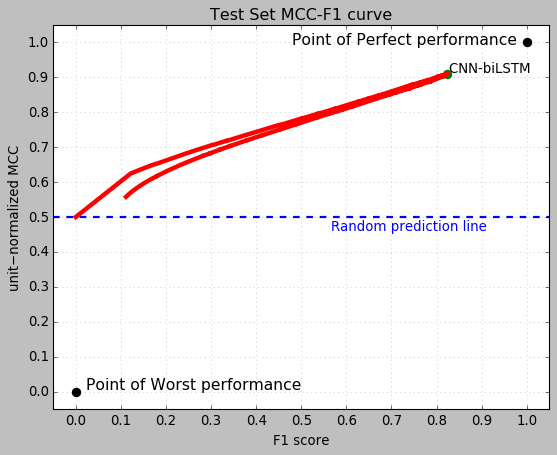

In [158]:
plotting(mcc,f1,thresholds,MCC_F1_Met,T_index, classifer_name='CNN-biLSTM ')
plt.savefig('MCC-F1-CNNbiLSTM-best-model.png', dpi=1200, bbox_inches='tight')